# Skaters (Season 2024/25) - Faceoff Win Rate

### Import libraries

In [1]:
import sys
import os
import pandas as pd

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
from utils import data_cleaning
from utils import distribution_analysis as da
from utils import discrete_distribution_models as ddm
from utils import correlation_analysis
from utils import hypothesis_testing
from utils import regression_analysis

### Import the dataset

In [92]:
#skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
skaters_df = "../data/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


### Read the data

In [93]:
data_cleaning.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


### Variable and Filter

In [ ]:
situation = "all"
position = "C"

df_fow = df.copy()
df_fow = df_fow[(df_fow["position"]==position) & (df_fow["situation"]==situation) ]
df_fow = df_fow.drop(["position", "situation"], axis=1)

### New Feature and Filter

In [96]:
feature1 = "I_F_faceOffsWon"
feature2 = "faceoffsLost"
feature_total = "faceoffsTotal"
feature = "faceoffs_win_rate"

min_faceoffs = 300

In [ ]:
df_fow[feature_total] = df_fow[feature1] + df_fow[feature2]
df_fow[feature] = df_fow[feature1] / df_fow[feature_total]

In [ ]:
df_fow = df_fow[ df_fow[feature_total]>=min_faceoffs ]

In [ ]:
name_player="Auston Matthews"
ref_data = df_fow[(df_fow["name"]==name_player)]

### Summary Statistics

In [ ]:
res = df_fow.loc[lambda d: d[feature].idxmax()]
print(f"Center with the highest rate: {res["name"]} with {res[feature]:.2f}\t(Win: {int(res[feature1])}, Lost: {int(res[feature2])}).")

res = df_fow.loc[lambda d: d[feature].idxmin()]
print(f"Center with the lowest rate: {res["name"]} with {res[feature]:.2f}\t(Win: {int(res[feature1])}, Lost: {int(res[feature2])}).")

print(f"Mean: {df_fow[feature].mean()}")
print(f"Variance: {df_fow[feature].var()}")
print(f"Standard deviation: {df_fow[feature].std()}")

Center with the highest rate: Jean-Gabriel Pageau with 0.60	(Win: 589, Lost: 399).
Center with the lowest rate: Fedor Svechkov with 0.37	(Win: 123, Lost: 212).
Mean: 0.5042797513843672
Variance: 0.0023007813658800762
Standard deviation: 0.04796646084380289


### Data cleaning

In [ ]:
# Missing values?
data_cleaning.report_nan(df_fow)

No missing values found.


In [ ]:
df_fow = data_cleaning.drop_duplicate_columns(df_fow)

Removed duplicate columns: ['I_F_shifts', 'faceoffsWon', 'penalityMinutes', 'xGoalsAgainstAfterShifts', 'corsiForAfterShifts', 'corsiAgainstAfterShifts', 'fenwickForAfterShifts', 'fenwickAgainstAfterShifts']
Number of samples: 140
Number of features: 146


In [ ]:
df_fow = df_fow.drop(["playerId", "season", "name", "team"], axis=1)
data_cleaning.print_df_size(df_fow)

Number of samples: 140
Number of features: 142


## Part 01 - Univariate Analysis

### Grouped Frequency Tables

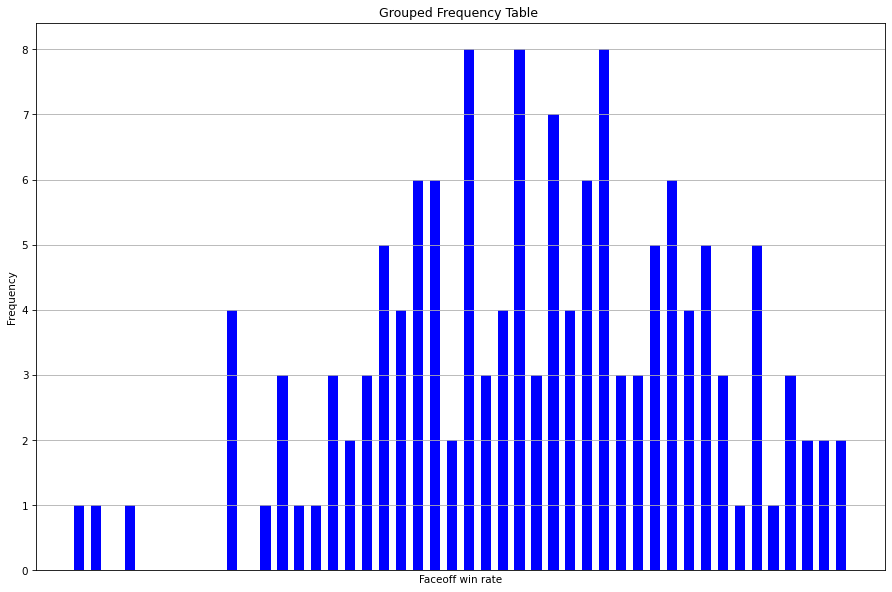

In [ ]:
da.plot_grouped_ftab(df_fow[feature], xlabel=label, bin_size=0.005)

### Cumulative Distribution Function

Auston Matthews - Percentile rank: 90.00
Median: 0.51
Interquartile range: 0.07
Quartile skewness: -0.02


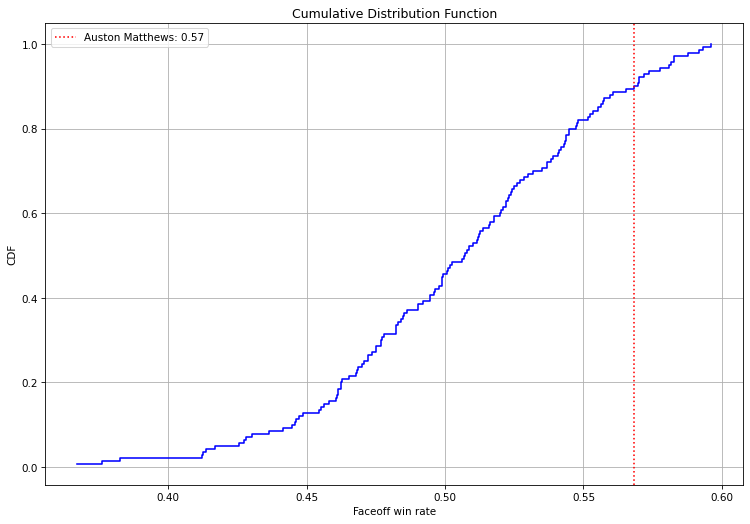

In [ ]:
ref = ref_data[feature].values[0]

da.print_percentile_rank(ref, df_fow[feature], label=name_player)
da.plot_cdf(ref, df_fow[feature], label=name_player, xlabel=label)

### Modeling Distributions

### Estimation

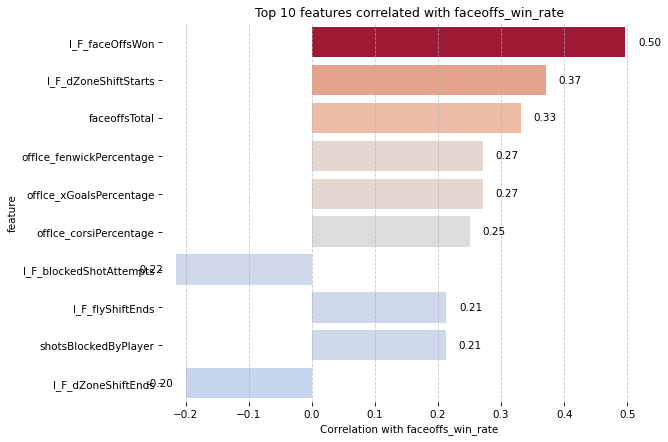

In [ ]:
top_corr = correlation_analysis.plot_top_correlations(df_fow, feature)